In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA


In [40]:
plt.rcParams["figure.figsize"] = [9.5, 6]

aliens = pd.read_csv("data/starfinder_aliens.csv")
size_categories = ["Fine", "Diminutive", "Tiny", "Small", "Medium", "Large", "Huge", "Gargantuan", "Colossal"]
aliens["size"] = pd.Categorical(aliens['size'], categories = size_categories , ordered = True)

aliens.describe()

,CR,XP,Init,HP,EAC,KAC,fortitude,reflex,will,speed,...,medicine,mysticism,perception,physical_science,piloting,profession,sense_motive,sleight_of_hand,stealth,survival
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,6.313187,12563.186813,3.476190,98.681319,18.362637,19.824176,7.849817,7.509158,7.490842,32.948718,...,0.805861,4.212454,14.128205,1.358974,1.758242,0.509158,2.893773,0.106227,5.736264,3.040293
std,4.481117,38245.745259,2.432996,85.151234,5.591189,5.637180,4.875223,4.288419,5.038903,12.522228,...,3.541098,9.156659,6.971189,4.995152,5.901160,2.636165,7.047089,1.060520,8.089802,6.616756
min,0.300000,135.000000,-1.000000,5.000000,9.000000,10.000000,0.000000,-1.000000,-2.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,800.000000,2.000000,35.000000,14.000000,15.000000,4.000000,4.000000,4.000000,30.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2400.000000,3.000000,84.000000,18.000000,20.000000,7.000000,7.000000,7.000000,30.000000,...,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,6400.000000,5.000000,135.000000,22.000000,23.000000,11.000000,10.000000,10.000000,40.000000,...,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
max,20.000000,307200.000000,12.000000,485.000000,35.000000,37.000000,23.000000,20.000000,22.000000,120.000000,...,25.000000,39.000000,34.000000,30.000000,33.000000,19.000000,34.000000,14.000000,31.000000,34.000000


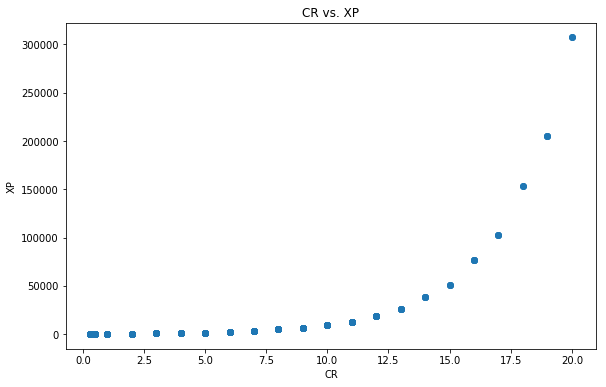

In [3]:
plt.scatter("CR", "XP", data = aliens)
plt.xlabel("CR")
plt.ylabel("XP")
plt.title("CR vs. XP")
plt.show()

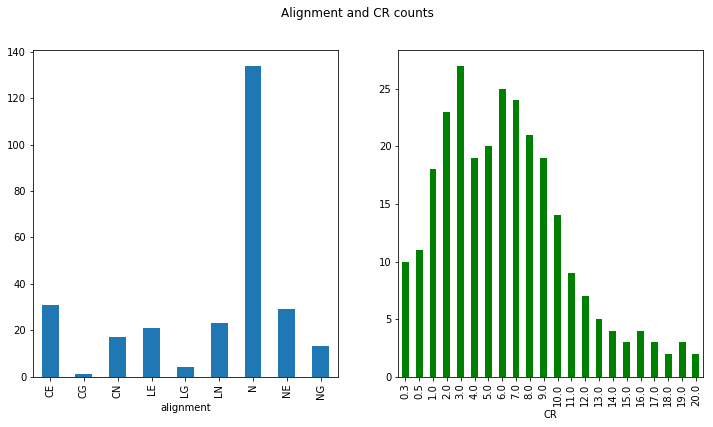

In [4]:
plt.figure(1, figsize=(12,6))
plt.subplot("121")
aliens.groupby("alignment")["name"].nunique().plot(kind = "bar")
plt.subplot("122")
aliens.groupby("CR")["name"].nunique().plot(kind = "bar", color = "green")
plt.suptitle("Alignment and CR counts")
plt.show()

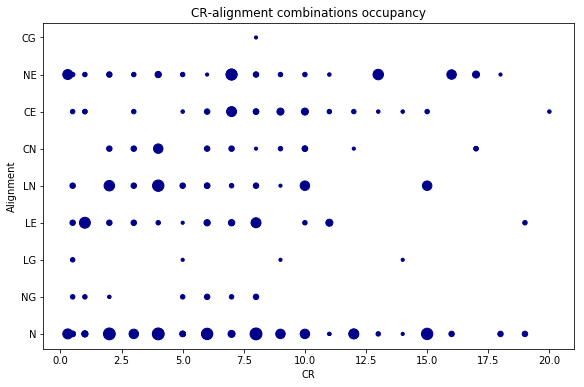

In [5]:
def count_aliens(*groups):
    groups = list(groups)
    return aliens.groupby(groups)["name"].count()

plt.scatter(x = "CR", y = "alignment", s = count_aliens("CR", "alignment") * 10, c = "darkblue", data = aliens)
plt.xlabel("CR")
plt.ylabel("Alignment")
plt.title("CR-alignment combinations occupancy")
plt.show()

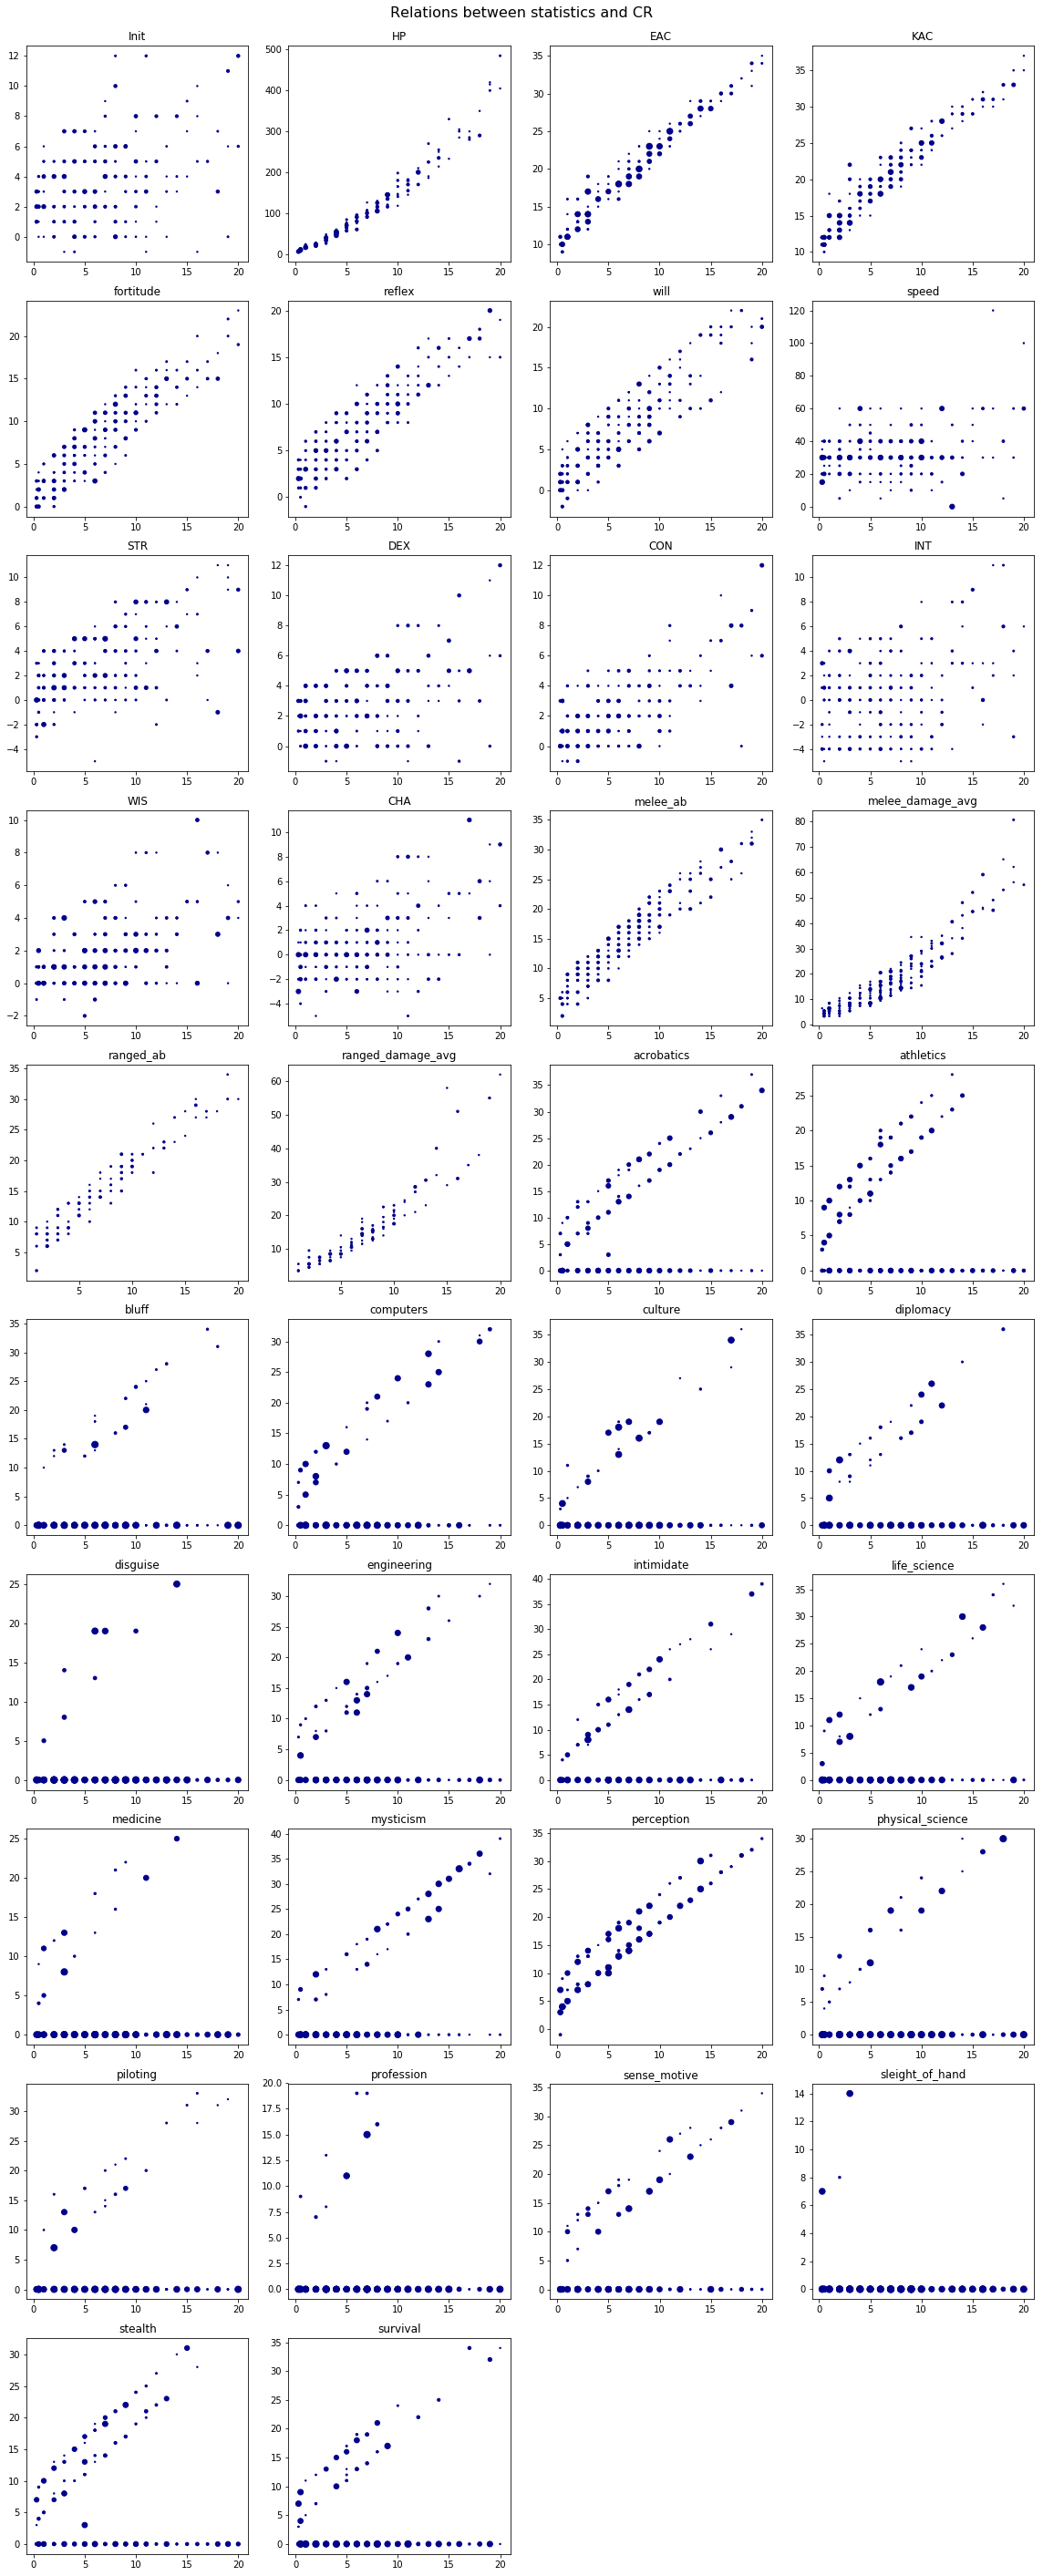

In [6]:
numeric_stats = aliens.select_dtypes(include=[np.number]).columns.tolist()
stats_of_interest = numeric_stats[2:]
ncol = 4
nrow = math.ceil(len(stats_of_interest)/ncol)

plt.figure(1, figsize=(4*ncol,4*nrow))

for i, stat in enumerate(stats_of_interest):
    plt.subplot(nrow, ncol, i+1)
    plt.scatter(x = "CR", y = stat, s = count_aliens("CR", stat) * 2, c = "darkblue", data = aliens)
    plt.title(stat)

plt.tight_layout()
plt.subplots_adjust(top=0.965)
plt.suptitle("Relations between statistics and CR", size = 16)
plt.show()

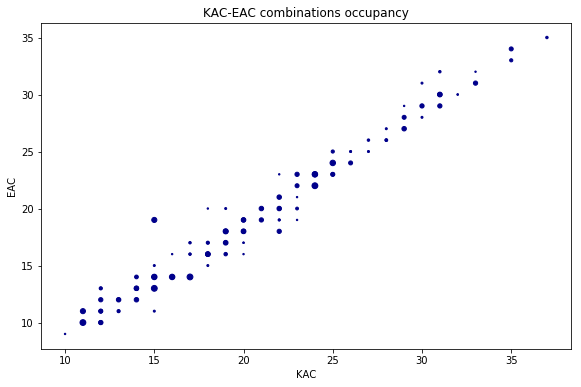

In [7]:
alignment_colors = {
    "CE": "orange",
    "CN": "purple",
    "CG": "blue",
    "NE": "red",
    "N": "grey",
    "NG": "green",
    "LE": "darkred",
    "LN": "darkblue",
    "LG": "darkgreen",
}

x_param = "KAC"
y_param = "EAC"

plt.scatter(x = x_param, y = y_param, s = count_aliens(x_param, y_param) * 2, c = "darkblue", data = aliens)
plt.xlabel(x_param)
plt.ylabel(y_param)
plt.title(f"{x_param}-{y_param} combinations occupancy")
plt.show()

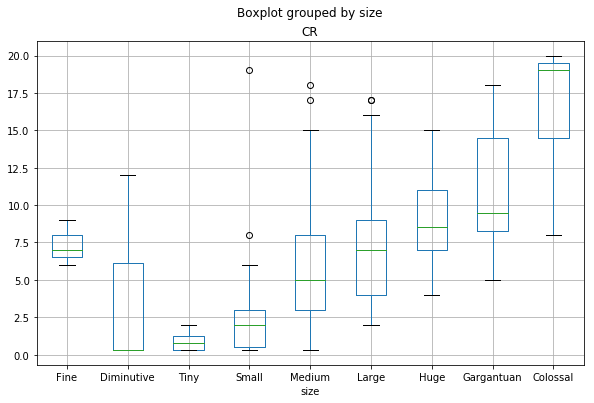

In [8]:
aliens.boxplot(column = "CR", by = "size")
plt.show()

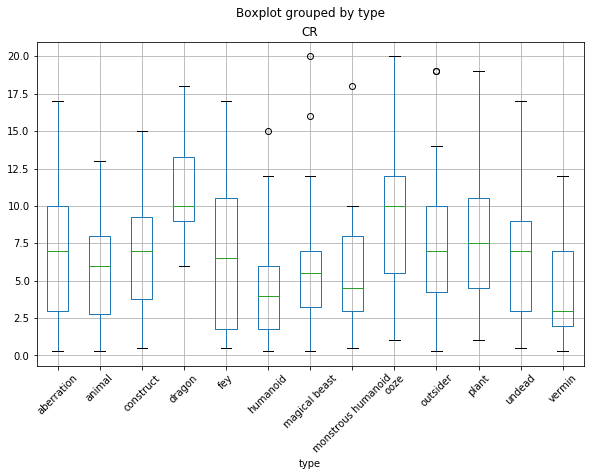

In [9]:
aliens.boxplot(column = "CR", by = "type")
plt.xticks(rotation = 45)
plt.show()

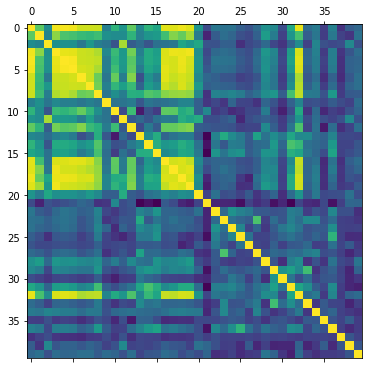

In [3]:
correlation = aliens.corr()

plt.matshow(correlation)
plt.show()

correlation.style.background_gradient()

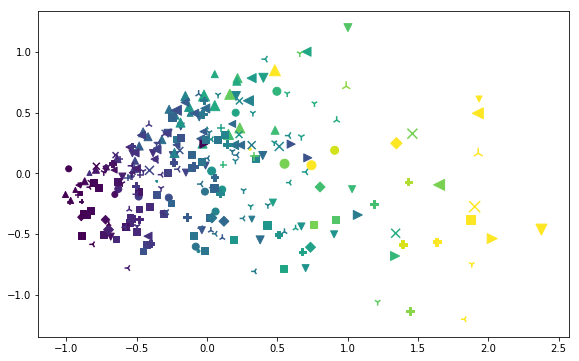

In [81]:
numeric_stats = aliens.select_dtypes(include=[np.number]).columns.tolist()
stats_of_interest = numeric_stats[2:]

aliens_pca_selection = aliens.replace(to_replace = np.nan, value = 0, inplace = False)[stats_of_interest]
aliens_norm = (aliens_pca_selection - aliens_pca_selection.mean()) / (aliens_pca_selection.max() - aliens_pca_selection.min())

pca = PCA(n_components = 2)
components = pca.fit_transform(aliens_norm)
components = pd.DataFrame(components, columns = ['x', 'y'])
components = pd.concat((aliens[["name", "CR", "alignment", "type", "size"]], components), axis = 1)

types = aliens["type"].unique()
shapes = "ov^<>sP+xD1234"

for i, t in enumerate(types):
    m = shapes[i]
    chosen_rows = components[components["type"] == t]
    sizes = (chosen_rows["size"].cat.codes + 3)**2
    plt.scatter('x', 'y', c = 'CR', s = sizes, marker = m, data = chosen_rows)

plt.show()